Curve fitting with numpy
=========

In [74]:
# We are given a list on 20 data points;
data = [
  (1.36, 3.18),
  (1.19, 0.13),
  (2.95, 10.54),
  (2.84, 9.59),
  (0.44, -1.69),
  (2.83, 6.43),
  (1.39, 0.13),
  (1.88, 2.32),
  (1.23, -0.41),
  (0.92, -0.11),
  (0.97, 1.14),
  (2.19, 4.05),
  (2.02, 4.39),
  (2.48, 5.54),
  (1.2, 0.94),
  (0.22, -0.92),
  (0.3, 1.8),
  (1.02, 1.4),
  (0.07, 0.94),
  (2.82, 6.72),
]

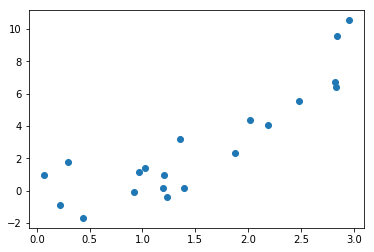

In [76]:
# Let us visualize our data as a scatter plot
import matplotlib.pyplot as plt
fig,ax = plt.figure(), plt.axes()

dataX, dataY = zip(*data)
ax.plot(dataX, dataY, "o")

plt.show()


In [77]:
# We will use the numpy "polyfit" and "poly1d  functions
# to fit polynomials to our data using a "least squares fit"

# We first look up these functions' help 
# to understand how to use them
import numpy as np
help(np.polyfit)

Help on function polyfit in module numpy.lib.polynomial:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting polynomial
    rcond : float, optional
        Relative condition number of the fit. Singular values smaller than
        this relative to the largest singular value will be ignored. The
        default value is len(x)*eps, where eps is the

In [63]:
help(np.poly1d)

Help on class poly1d in module numpy.lib.polynomial:

class poly1d(builtins.object)
 |  A one-dimensional polynomial class.
 |  
 |  A convenience class, used to encapsulate "natural" operations on
 |  polynomials so that said operations may take on their customary
 |  form in code (see Examples).
 |  
 |  Parameters
 |  ----------
 |  c_or_r : array_like
 |      The polynomial's coefficients, in decreasing powers, or if
 |      the value of the second parameter is True, the polynomial's
 |      roots (values where the polynomial evaluates to 0).  For example,
 |      ``poly1d([1, 2, 3])`` returns an object that represents
 |      :math:`x^2 + 2x + 3`, whereas ``poly1d([1, 2, 3], True)`` returns
 |      one that represents :math:`(x-1)(x-2)(x-3) = x^3 - 6x^2 + 11x -6`.
 |  r : bool, optional
 |      If True, `c_or_r` specifies the polynomial's roots; the default
 |      is False.
 |  variable : str, optional
 |      Changes the variable used when printing `p` from `x` to `variable`
 | 

In [94]:
# For any n points we can fit a unique 
# (n-1)th-degree polynomial through the points
# so that the polynomial passes exactly through the 
# data points

# Lets find the coefficients of a
# 19th degree polynomial p that passes 
# through all 20 points
p_coeffs = np.polyfit(dataX,dataY, 19)

/home/miek/stuff/devenv/lib/python3.6/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':


In [95]:
p_coeffs

array([ -3.18539670e+02,   6.68603366e+03,  -5.89570950e+04,
         2.67908425e+05,  -5.32306604e+05,  -5.99817584e+05,
         5.72029885e+06,  -8.69702146e+06,  -2.55751219e+07,
         1.56254880e+08,  -3.95305093e+08,   6.32806621e+08,
        -7.01142368e+08,   5.51343098e+08,  -3.06943392e+08,
         1.18340402e+08,  -3.02547577e+07,   4.75522618e+06,
        -3.98557673e+05,   1.25918369e+04])

In [96]:
# We construct a function, that outputs the value
# of the polynomial with these coeeficients
p = np.poly1d(p_coeffs)

In [97]:
# We can see what this polynomial is 
# by evaluating p9_function(x) with x 
# some sympy symbol. 

import sympy
sympy.init_printing()
from sympy.abc import x

sympy.expand(p(x))

In [ ]:
# Compare the coefficients of our polynomial
# with the numbers in p_coeffs

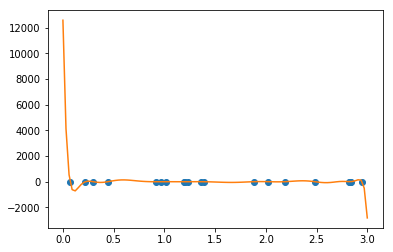

In [98]:
# Let us plot our data and p_deg9 together
X = np.linspace(0,3,100)
Y = p(X)

fig, ax = plt.figure(), plt.axes()

ax.plot(dataX,dataY, "o")
ax.plot(X,Y)
plt.show()

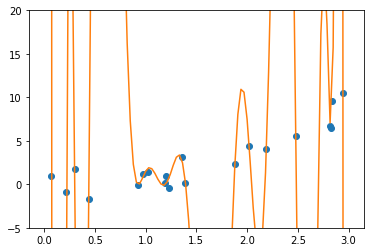

In [99]:
# Notice how this 19th degree polynomial passes
# through every data point, but oscilates
# quite wildly out of the range of the Y-coordinates 
# of the data points: the interval [-2,9].
# This polynomial is "over fitted" to the data.

# Let's look closer
X = np.linspace(0,3,100)
Y = p(X)

fig, ax = plt.figure(), plt.axes()
ax.set_ylim(-5,20)

ax.plot(dataX,dataY, "o")
ax.plot(X,Y)
plt.show()

In [100]:
# Let us fit 2nd degree polynomial q, 
# i.e., a parabola, to the same data
q_coeffs = np.polyfit(dataX,dataY, 2)
q = np.poly1d(q_coeffs)
sympy.expand(q(x))

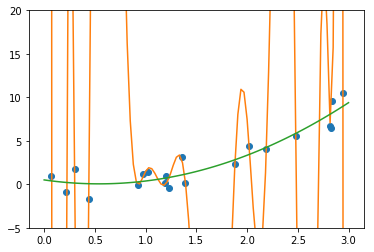

In [102]:
# ... and plot our data 
# along with p and q 
# on the same set of axes
fig, ax = plt.figure(), plt.axes()
ax.set_ylim(-5,20)

X = np.linspace(0,3,100)

ax.plot(dataX,dataY, "o")
ax.plot(X,p(X))
ax.plot(X,q(X))

plt.show()

In [103]:
# Notice how the parabola does not 
# pass through all the datapoints,
# but matches the trend of the data
# much closer than the 19th degree polynomial.

# That is not unexpected if you consider how our
# data points were generated:
#
# import random
# X = [round(random.uniform(0,3), 2) for _ in range(20)]
# Y = [round(x**2 + random.uniform(-2,2), 2) for x in X]
# data = list(zip(X,Y))